In [1]:
# Imports:
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np

# 1. Data

In [2]:
# a. Load Date_Fruit_Datasets.csv into a pandas dataframe. Print out the header. Use pandas.DataFrame.describe to summarize the data. 

data = pd.read_csv("C:/Users/miche/Downloads/Date_Fruit_Datasets.csv")

display(data.head())
display(data.describe())
display(data.shape)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


(898, 35)

In [3]:
# Using markdown, explain the meaning of the columns (as well as you can with the information available) and make observations about the dataset.

**Explanation:**

As per the business problem, the features of this dataset are used to find the label of the column 'Class'. The features in this dataset represent measurable characteristics of date fruits, which are used to predict the target variable: the fruit's class. There are 34 features, and a shape of 898 rows by 35 columns.

In [4]:
# b.  Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. 
#     Use pandas.DataFrame.duplicates to check for duplicate entries. 
#     Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. 

display(data.info())
print("Duplicates: \n", data.duplicated().sum())
print("Nulls or Missing: \n", data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

None

Duplicates: 
 0
Nulls or Missing: 
 AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


In [5]:
# Use markdown to make observations and explain what you have done.

**Explanation:**

The dataset does not require any changes as there aren't any missing, duplicate, or incorrect data types. For example, all columns except AREA, CONVEX_AREA, EntropyRG, EntropyRB, and Class should be float values; columns mentioned except Class should be integer values; and Class should be a string/object type. All these columns are the data types that they should be, and as such, do not need any changes implemented.

['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


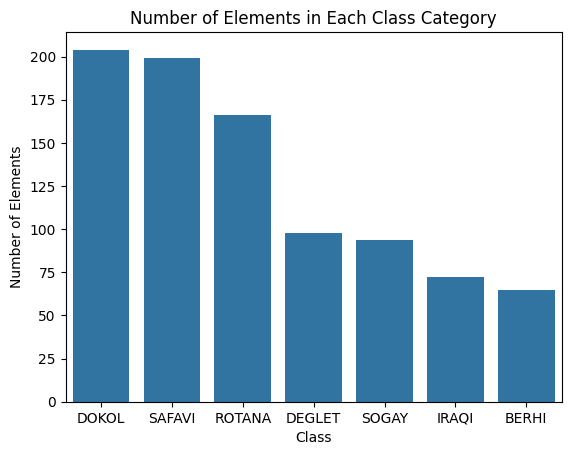

In [6]:
# c.  Create a bar plot using seaborn.barplot of the number of elements in each category.

# Check the number of unique classes
unique_data = data['Class'].unique()
print(unique_data)

sns.barplot(x=data['Class'].value_counts().index, y=data['Class'].value_counts().values)
plt.xlabel('Class')
plt.ylabel('Number of Elements')
plt.title('Number of Elements in Each Class Category')
plt.show()

In [7]:
# Use markdown to comment on how well balanced the dataset is.

**Explanation:**

The bar plot shows the distribution of samples across each class. It reveals a left-skewed imbalance - for instance, DOKOL has around 200 samles, while BERHI has only about 60.

In [8]:
# d.  Move the labels into a separate dataframe and use sklearn.preprocessing.LabelEncoder to convert the string labels into integers. 
#     Reshape the labels into a 2d array. 

label = data["Class"]

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(label)

y = tf.reshape(encoded_data, shape=(-1, 1))

# Print label to ensure that encoding and reshaping worked
print(y)

tf.Tensor(
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]

In [9]:
# Determine which number has been assigned to each type of date and record this information in markdown.

**Explanation:**

The label encoding assigns integers to each class as follows:

0 = DOKOL, 1 = SAFAVI, 2 = ROTANA, 3 = DEGLET, 4 = SOGAY, 5 = IRAQI, 6 = BERHI.

In [10]:
# e.  Use sklearn.preprocessing.MinMaxScaler to scale the features (but not the labels). 
#     Split the data into training, testing and validation sets with appropriate proportions.

features = data.drop(columns = ["Class"])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Set the training set to 80%, validation and testing to 10%
x_train, x_valtest, y_train, y_valtest = train_test_split(scaled_data, encoded_data, train_size=0.8, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, train_size=0.5, random_state=42)

# Print length to ensure that the splitting worked, and test the scaled dataset to ensure the scaling of the features worked
print(f'x_train length: {len(x_train)} \nx_val length: {len(x_val)} \nx_test length: {len(x_test)}')
df_features = pd.DataFrame(scaled_data)
df_features.head()

x_train length: 718 
x_val length: 90 
x_test length: 90


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458251,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687311,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139260,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707124,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634558,0.615256,0.710963,0.581443,0.485820,0.395128


# 2. Modeling

In [11]:
# a.  Use tf.keras.Sequential to create a fully connected artificial neural network with at least two hidden layers. 
#     Choose an activation function for each layer, and make sure the input and output dimensions are appropriate for the data. 
#     Print a summary of the model using tf.summary.

model = Sequential()
model.add(Dense(units=128, input_dim=34, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=7, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4480      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 15,047
Trainable params: 15,047
Non-trainable params: 0
_________________________________________________________________


In [12]:
# b.  Compile the model with a choice of optimizer and loss function, and the set the metrics argument equal to ['accuracy'].

optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [13]:
# c.  Train the model and record the training accuracy. Find the validation accuracy and confusion matrix.

model.fit(x_train, y_train, epochs=500)

y_pred_train = np.argmax(model.predict(x_train), axis=1)
y_pred_val = np.argmax(model.predict(x_val), axis=1)
y_pred_test = np.argmax(model.predict(x_test), axis=1)

print(f'Training Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred_val)}')
print(f'Test: {confusion_matrix(y_test, y_pred_test)}')

Epoch 1/500
23/23 [==============================] - 1s 2ms/step - loss: 1.4325 - accuracy: 0.4958
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.7173
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7702
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7939
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7925
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8398
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8621
Epoch 8/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8593
Epoch 9/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8565
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8565
Epoch 11/

In [14]:
# d.  Return to the above steps to try at least five different choices of hyperparameters 
#     (including dimensions, activation functions, number of layers, optimizer, loss function, etc.). 
#     Neatly present a description each model tried along with the training and validation accuracies, and the confusion matrix.

**Explanation:**
<pre>
MODEL 1 - learning rate=0.005:

model.add(Dense(units=128, input_dim=34, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=7, activation = 'softmax'))
    
Final Epoch: Epoch 394/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000
Training Accuracy: 1.0
Validation Accuracy: 0.9777777777777777
Test: 
[[ 7  0  0  1  0  0  0]
 [ 0  9  1  0  0  0  1]
 [ 0  1 20  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0 17  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  2  0  0  0  0 10]]0 10]]

MODEL 2 - learning rate=0.005:

model.add(Dense(units=64, input_dim=34, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=7, input_dim=34, activation = 'softmax'))

Final Epoch: Epoch 402/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.000000

Training Accuracy: 1.0
Validation Accuracy: 0.988888888888889
Test: 
[[ 6  0  0  2  0  0  0]
 [ 0  9  1  0  0  0  1]
 [ 0  1 20  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0 17  0  0]
 [ 0  0  0  0  0 
 [ 0  3  0  0   0]
  1  0  8]]

MODEL 3 - learning rate=0.005:

model.add(Dense(units=64, input_dim=34, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=7, activation = 'softmax'))

))

Final Epoch: Epoch 403/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 1.000000

Training Accuracy: 1.0
Validation Accuracy 0.9555555555555556
Test: 
[[ 7  0  0  1  0  0  0]
 [ 0  9  1  0  0  0  1]
 [ 0  1 20  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0 17  0  0]
 [ 0  0  0  14 0]
 [ 0  1  0  0  0  0  0  
</pre></pre>

# 3. Conclusion

In [15]:
# a.  Select the best model and justify your selection using markdown.

**Explanation:**

I believe that the best model is model 1, which reaches an accuracy of 1.0 at epoch 394. This model is the best because of the following reasons:
1. It reaches an accuracy of 1.0 at the lowest number of epochs,
2. The high training and validation accuracies suggest that the model generalizes well and is neither overfitting or underfitting,
3. This model has the fewest misclassifications (6), compared to 9 in model 2, indicating stronger performance on unseen data,
4. Lastly, as with the previous point, the confusion matrix shows that the test data performed reasonably well.

3/3 [==============================] - 0s 3ms/step


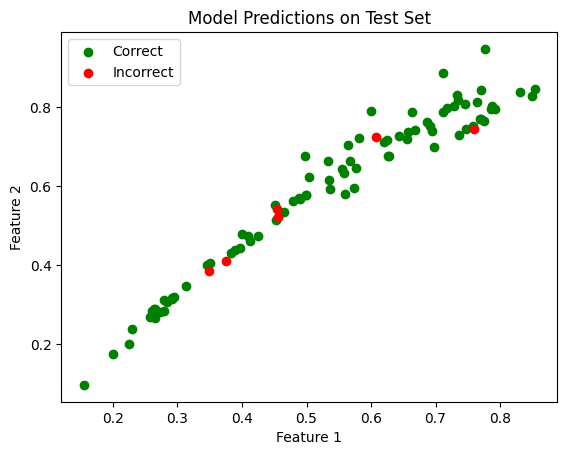

Test Prediction: [1 5 1 5 5 4 5 4 4 5 3 3 4 5 1 6 3 5 2 6 2 4 1 6 1 5 3 6 0 6 2 4 5 6 1 5 5
 6 2 1 2 4 5 4 2 3 2 2 4 1 6 6 2 0 1 4 6 4 0 3 5 2 2 2 0 0 2 5 4 2 2 3 6 4
 0 2 3 4 2 1 4 4 2 4 2 2 1 1 0 2]
Test Accuracy: 0.9333333333333333
Test Matrix 
: [[ 7  0  0  1  0  0  0]
 [ 0  9  1  0  0  0  1]
 [ 0  1 20  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0 17  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  2  0  0  0  0 10]]


In [30]:
# b.  Use the best model to make predictions on the testing set. Find the testing accuracy and confusion matrix.

y_pred_test = np.argmax(model.predict(x_test), axis=1)

correct = y_pred_test == y_test
plt.scatter(x_test[correct, 0], x_test[correct, 1], c='green', label='Correct')
plt.scatter(x_test[~correct, 0], x_test[~correct, 1], c='red', label='Incorrect')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Model Predictions on Test Set')
plt.legend()
plt.show()


print(f'Test Prediction: {y_pred_test}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')
print(f'Test Matrix: \n {confusion_matrix(y_test, y_pred_test)}')

In [17]:
# c.  Use markdown to comment on how well the model works to make predictions for this use case.

**Explanation:**

The model works well to make predictions. Here were some of the observations I made:
1. The test accuracy is good because it is close to 100%, while not reaching it, which means that the model is not overfitting.
2. The confusion matrix confirms that the model misclassified only 6 samples, which is a strong result given the dataset's complexity.
3. Lastly, the visual goes into more detail regarding which points were misclassified. It also shows where the 6 misclassifications occurred.